In [1]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Define a seed.
seed = 42
# Reset the PN sequence generator.
np.random.seed(seed)
random.seed(seed)

### Gerando os dados de 2 classes.

In [3]:
# Martriz de atributos.
X = np.array([
    [-3.4, 3], [-8, -2],
    [-3.2, 3], [2, 8]
    
])

# Vetor de rótulos.
y = np.array([0, 0, 1, 1])

# Dimensões das arrays.
print('Dimensão de X:', X.shape)
print('Dimensão de y:', y.shape)

Dimensão de X: (4, 2)
Dimensão de y: (4,)


### Plotando as 2 classes.

#### Qual o formato mais apropriado para a função discriminante, $g(x)$?

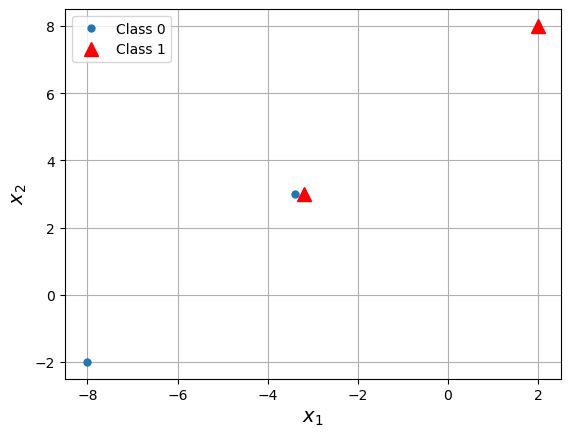

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Definindo algumas funções úteis.

In [5]:
def discriminant_function(X, a):
    '''Função que implementa a função discriminante.'''
    return X.dot(a)

def classifier(X, a):
    '''Função que realiza a classificação. Implementa a função hipótese de classificação.'''
    # Função discriminante.
    g = discriminant_function(X, a)
    # Função de limiar de decisão rígido. A saída será igual a '1' quando g = 0.
    h = np.heaviside(g, 1.0)
    return h

def error_function(X, a, y):
    '''Função para cálculo do erro médio de classificação.'''
    h = classifier(X, a)
    error = 0.0
    for i in range(0, len(y)):
        error += np.power(y[i] - h[i], 2.0)
    return error/len(y)

def accuracy(y_pred, y):
    '''Função para cálculo da acurácia do classificador.'''
    acc = 0
    for i in range(len(y)):
        if(y[i]==y_pred[i]):
            acc += 1
    return acc/len(y)

### Definindo o vetor de pesos ótimo.

Iremos usar os pesos encontrados no exemplo anterior para a função discriminante com formato de reta.

In [6]:
a = np.array([[0.3967141530112327], [0.6384082095101224], [0.5700146031157893]])

print('Dimensão de a:', a.shape)

Dimensão de a: (3, 1)


### Alterando a matriz de atributos para que ela implemente o formato apropriado da função discriminante.

Depois de analisarmos a figura com a disposição das classes, podemos concluir que o formato mais apropriado para a função discriminate é o de uma **reta**, conforme dado pela equação abaixo.

$$g(\textbf{x}(i)) = a_0 + a_1x_1(i) + a_2x_2(i), \forall i,$$

onde $a_0$ é o peso de bias e o atributo associado a ele, $x_0$, é sempre feito igual a 1.

Em formato matricial, considerando todo o conjunto de treinamento, ela é definida como

$$\textbf{g}(\textbf{X}) = \textbf{Xa},$$

onde $\textbf{a}$ e $\textbf{X}$ são um vetor e uma matriz, respectivamente.

In [7]:
# Add bias to feature matrix.
X = np.c_[np.ones((len(y), 1)), X]

In [8]:
print('X:', X.shape)

X: (4, 3)


### Plotando as regiões de decisão.

**OBS:** Notem que a matriz de atributos criada para plotarmos as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

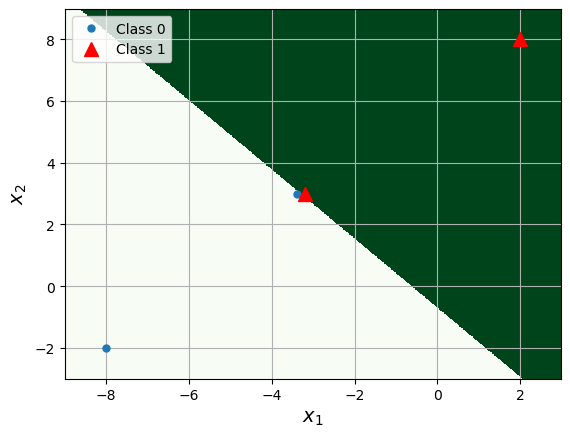

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = -9.0, 3.0
y_min, y_max = -3.0, 9.0
# step size in the mesh
h = .02
# O meshgrid cria uma combinação de pontos (valores) entre os intervalos definidos para plotarmos as regiões de decisão.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also have the same shape as the one created for the training.
attribute_matrix = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]

# Classify.
Z = classifier(attribute_matrix, a)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,1], X[idx0,2], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,1], X[idx1,2], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.grid()

plt.show()

In [17]:
for i in range(len(y)):
    g = discriminant_function(X[i,:], a)
    h = np.heaviside(g, 1.0)
    print('g(x): %1.4f \t- h(x): %1.1f' % (g[0], h[0]))

g(x): -0.0638 	- h(x): 0.0
g(x): -5.8506 	- h(x): 0.0
g(x): 0.0639 	- h(x): 1.0
g(x): 6.2336 	- h(x): 1.0


**Observações**

O classificador faz classificações completamente confiantes mesmo para amostras muito próximas da fronteira de separação (i.e., da função discriminante).

Seria interessante que ele nos desse uma ideia da confiança (i.e., probabilidade) que ele tem sobre aquela classificação.

Assim, iremos na sequência, trocar a função degrau por sua versão suavizada (função logística), que irá nos dar a probabilidade de uma amostra pertencer a uma determinada classe.